##<ins> Supervised Reinforcement Learning with Recurrent Neural Network for Dynamic Treatment Recommendation

By:
Zhengpei Cheng,
Nicholas Daponte

4/20/2024





# Mount Notebook to Google Drive


In [ ]:
import os
from google.colab import drive

# View current working directory
print("Current Working Directory:", os.getcwd())

# Mount Google Drive
drive.mount('/content/gdrive')

# Change working directory to your file position
path = "/content/gdrive/My Drive/Big Data Project/"
os.chdir(path)

# Confirm the change
print("Working Directory:", os.getcwd())

Current Working Directory: /content/gdrive/.shortcut-targets-by-id/1Dx927vONLIBor81mSpuoJzQXnQIr46wU/Big Data Project
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Working Directory: /content/gdrive/.shortcut-targets-by-id/1Dx927vONLIBor81mSpuoJzQXnQIr46wU/Big Data Project


# **Introduction**

## Background of the problem
  * **What type of problem: disease/readmission/mortality prediction,  feature engineeing, data processing, etc :**
The problem addressed in the paper is treatment recommendation in healthcare based on electronic health records (EHRs). It involves predicting optimal treatment strategies for patients based on their medical history, current condition, and other relevant factors. This problem falls under the domain of personalized medicine and healthcare optimization.
  * **What is the importance/meaning of solving the problem:**
  Solving the problem of treatment recommendation is crucial for improving patient outcomes and optimizing clinical decision-making. By leveraging EHR data, healthcare providers can tailor treatment plans to individual patients, leading to more effective interventions, reduced mortality rates, and better overall healthcare delivery. Furthermore, personalized treatment recommendations can enhance patient satisfaction and trust in the healthcare system.
  * **What is the difficulty of the problem:**
  One of the main challenges in treatment recommendation is the complexity and variability of patient data. EHRs contain diverse information, including medical history, lab results, vital signs, and demographics, making it challenging to extract meaningful insights and identify optimal treatment strategies. Additionally, the dynamic nature of patient health and the inherent uncertainty in medical outcomes add to the difficulty of the problem. Moreover, ensuring the safety and ethical soundness of treatment recommendations further complicates the task.
  * **The state of the art methods and effectiveness:**
  The paper discusses various approaches to treatment recommendation, including supervised learning (SL) and reinforcement learning (RL) techniques. Prior studies have explored SL methods to match diseases with medications based on expert systems but often struggle with personalization and lack of ground truth for "good" treatment strategies. RL approaches, particularly dynamic treatment regime (DTR) methods, offer a promising avenue by optimizing treatment decisions over time to maximize long-term patient outcomes. Deep RL models have shown effectiveness in learning optimal DTRs from EHR data, although challenges remain in aligning recommendations with doctors' prescriptions and handling the complexity of medication spaces. The proposed method, Supervised Reinforcement Learning with Recurrent Neural Network (SRL-RNN), aims to address these challenges by integrating SL and RL signals to learn a comprehensive treatment policy while leveraging RNNs to capture temporal dependencies in patient data
## Paper explanation
  * **What did the paper propose:**
  The paper proposed a novel deep architecture called Supervised Reinforcement Learning with Recurrent Neural Network (SRL-RNN) for dynamic treatment recommendation (DTR) systems based on large-scale electronic health records (EHRs). This approach combines supervised learning (SL) and reinforcement learning (RL) into a synergistic learning framework.
  * **What is the innovations of the method**:
  The main innovation of the SRL-RNN method lies in its ability to combine both supervised learning and reinforcement learning to handle complex relations among multiple medications, diseases, and individual characteristics. Unlike previous studies that focused solely on either SL or RL, SRL-RNN integrates both approaches to learn an integrated policy for treatment recommendation. Additionally, SRL-RNN utilizes an off-policy actor-critic framework and recurrent neural networks (RNNs) to address the challenges of analyzing longitudinal and temporal patient records and solving the Partially-Observed Markov Decision Process (POMDP) problem.
  * **how well the proposed method work (in its own metrics):**
  According to the paper's experimental results, SRL-RNN demonstrates promising performance in reducing estimated mortality in the hospital by 4.4% and providing better medication recommendations. These results are obtained through quantitative experiments and qualitative case studies conducted on the MIMIC-3 dataset, a publicly available real-world dataset.
  * **what is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem):**
  The paper's contribution to the research regime is significant as it addresses the limitations of existing approaches in treatment recommendation systems. By combining supervised learning and reinforcement learning in a synergistic manner, SRL-RNN offers a more generalizable and effective solution for DTR, especially in scenarios involving multiple diseases and medications. Moreover, the use of an off-policy actor-critic framework and RNNs enhances the model's ability to handle complex patient records and optimize treatment policies. Overall, the proposed method contributes to advancing the field of personalized medicine by leveraging large-scale EHR data to improve clinical decision-making.


  ## Example Treatment Reccomendation for a single patient hospital admission:

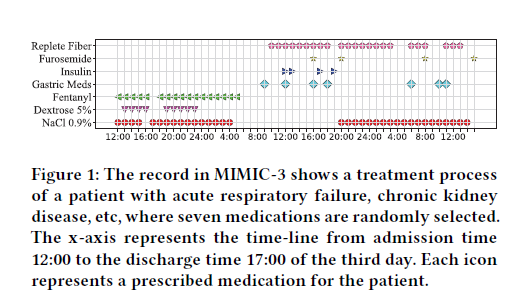

# Scope of Reproducibility:


1.   **Hypothesis 1:** Implementing the actor-critic framework using PyTorch instead of Keras and TensorFlow will yield comparable results in terms of treatment recommendation accuracy and mortality reduction on the MIMIC-3 dataset.

2.   **Hypothesis 2:** Adopting a preprocessing approach similar to the one used in the paper, which combines supervised learning and reinforcement learning signals, will lead to improved model performance in terms of reducing estimated mortality rates and providing better medication recommendations.




### Mount this notebook to google drive

In [ ]:
# no code is required for this section
'''
if you want to use an image outside this notebook for explanaition,
you can upload it to your google drive and show it with OpenCV or matplotlib
'''
# mount this notebook to your google drive
drive.mount('/content/gdrive')

# define dirs to workspace and data
#img_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-your-image>'

#import cv2
#img = cv2.imread(img_dir)
#cv2.imshow("Title", img)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Methodology



In [ ]:
# Preliminary Packages
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


##  Data
Data includes raw data (MIMIC III tables), descriptive statistics (our homework questions), and data processing (feature engineering).
  * Source of the data: Data is collected from queried [ ] tables from the MIMIC-3 v1.4 database.
  According to original paper.
  
  First, we did bigquery SQL to get raw data. Then we extract target data on Google Cloud Platform by pandas and numpy.

* To ensure statistical significance, we extract the top 1,000 medications and top 2,000 diseases (represented by ICD-9 codes) which cover 85.4% of all medication records and 95.3% of all diagnosis records, respectively. In order to experiment on different granularity of medications, we map the 1,000 medications into the third level of ATC1 (medication codes) using RxNorm API, resulting 92 distinct ATC codes. Therefore, the action space size of the experiments is 1,000 exact medications (K = 1000) or 92 drug categories (K = 92).


* For each patient, we extract relevant physiological parameters
, which include static variables and time-series variables. The static variables cover eight kinds of demographics: gender, age, weight, height, religion, language, marital
status, and ethnicity.

* The time-series variables contain lab values,
vital signs, and output events, such as diastolic blood pressure,
fraction of inspiration O2, Glascow coma scale, blood glucose, systolic blood pressure, heart rate, pH, respiratory rate, blood oxygen
saturation, body temperature, and urine output.

* These features correspond to the state s in MDP or the observation o in POMDP. We impute the missing variable with k-nearest neighbors and remove
admissions with more than 5 missing variables. Each hospital admission of a patient is regarded as a treatment plan. Time-series
data in each treatment plan is divided into different units, each of
which is set to 24 hours since it is the median of the prescription
frequency in MIMIC-3. If several data points are in one unit, we
use their average values instead.

## Load Queried Data from MIMIC-3 v1.4 Database

In [ ]:
# dir and function to load raw data
raw_data_dir = '/content/gdrive/My Drive/Big Data Project/Query_Tables/'
def load_raw_data(raw_data_dir):
  # implement this function to load raw data to dataframe/numpy array/tensor
  df = pd.read_csv(raw_data_dir)
  return df



# calculate statistics
def calculate_stats(raw_data):
  # implement this function to calculate the statistics
  # it is encouraged to print out the results
  return None

# process raw data
def process_data(raw_data):
    # implement this function to process the data as you need
  return None

#LOAD INITIAL/RAW/QUERIED DATA FROM GOOGLE DRIVE


#----------------------------------------------------------------
#Static Variables for Patients
height_weight = 'Static_var_height_weight.csv'
other_static_var = 'Static_var_not_height_weight.csv'
height_weight_path = raw_data_dir + height_weight
other_static_var_path = raw_data_dir + other_static_var
#Time dependant variables Patients
time_series_variables = 'Time_series_variables.csv'
time_series_variables_path = raw_data_dir + time_series_variables
#Other Raw Data
top_2000_diagnoses = 'top_2000_diagnoses.csv'
top_2000_diagnoses_path = raw_data_dir + top_2000_diagnoses
third_lvl_atc_codes = 'unique_chosen_atc.csv'
third_lvl_atc_codes_path = raw_data_dir + third_lvl_atc_codes
filtered_perscription_table = 'filtered_perscription_table.csv'
filtered_perscription_table_path = raw_data_dir + filtered_perscription_table
filtered_diagnoses_table = 'filtered_diagnoses_table.csv'
filtered_diagnoses_table_path = raw_data_dir + filtered_diagnoses_table
FINAL_FILTERED_PERSCRIPTION_TABLE_PATH = raw_data_dir + 'FINAL_FILTERED_MED.csv'
'''
################################################################################

'''

# LOAD DATA ABOVE
height_weight_df = load_raw_data(height_weight_path)
other_static_var_df = load_raw_data(other_static_var_path)
time_series_variables_df = load_raw_data(time_series_variables_path)
top_2000_diagnoses_df = load_raw_data(top_2000_diagnoses_path)
third_lvl_atc_codes_df = load_raw_data(third_lvl_atc_codes_path)
filtered_perscription_table_df = load_raw_data(filtered_perscription_table_path)
filtered_diagnoses_table_df = load_raw_data(filtered_diagnoses_table_path)
FINAL_FILTERED_PERSCRIPTION_TABLE_df = load_raw_data(FINAL_FILTERED_PERSCRIPTION_TABLE_PATH)
#FILTER
print("Shape of top_2000_diagnoses_df:", top_2000_diagnoses_df.shape)

#--------ICD9_CDOE (DIAGNOSIS) MATRIX------------------------------
# Step 1: Extract top 2000 unique ICD9_CODEs
top_2000_icd9_codes = top_2000_diagnoses_df['ICD9_CODE'].unique()
# Step 2: Filter filtered_diagnoses_table_df
filtered_diagnoses_filtered = filtered_diagnoses_table_df[filtered_diagnoses_table_df['ICD9_CODE'].isin(top_2000_icd9_codes)]
# Step 3: Group by HADM_ID and aggregate ICD9_CODEs into a list
hadm_id_icd9_map = filtered_diagnoses_filtered.groupby('HADM_ID')['ICD9_CODE'].agg(list).to_dict()
# Step 4: Print the dictionary
print(hadm_id_icd9_map)

Shape of top_2000_diagnoses_df: (2000, 2)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## **Raw Data Statistics**


In [ ]:
def dead_alive_split(df):
  dead_people=df.loc[~df['DEATHTIME'].isnull(),'SUBJECT_ID'].unique().tolist()
  dead_encounter=df[df["SUBJECT_ID"].isin(dead_people)]
  alive_encounter=df[~df["SUBJECT_ID"].isin(dead_people)]
  return dead_encounter,alive_encounter
dead_encounter,alive_encounter=dead_alive_split(other_static_var_df)

def event_count_metrics(alive_encounter, dead_encounter):
  return alive_encounter.groupby('SUBJECT_ID').size().describe(),dead_encounter.groupby('SUBJECT_ID').size().describe()
alive_statistics,dead_statistics=event_count_metrics(dead_encounter,alive_encounter)

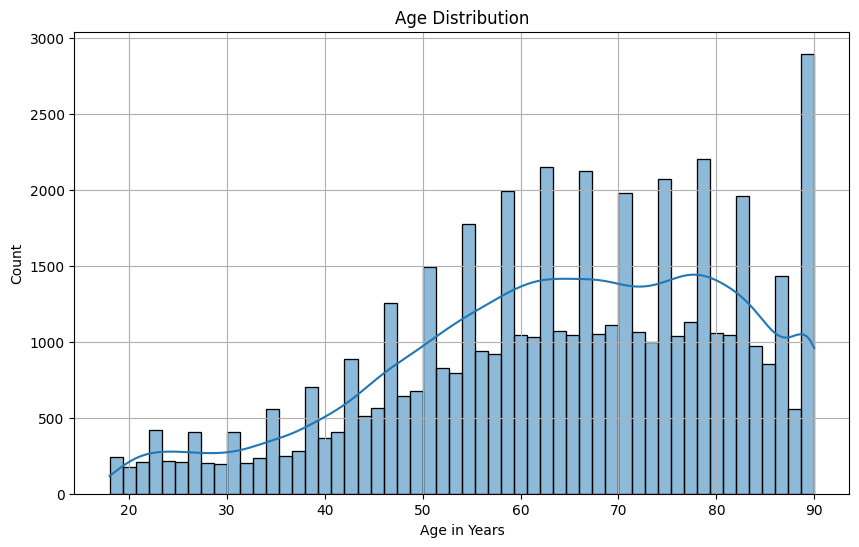

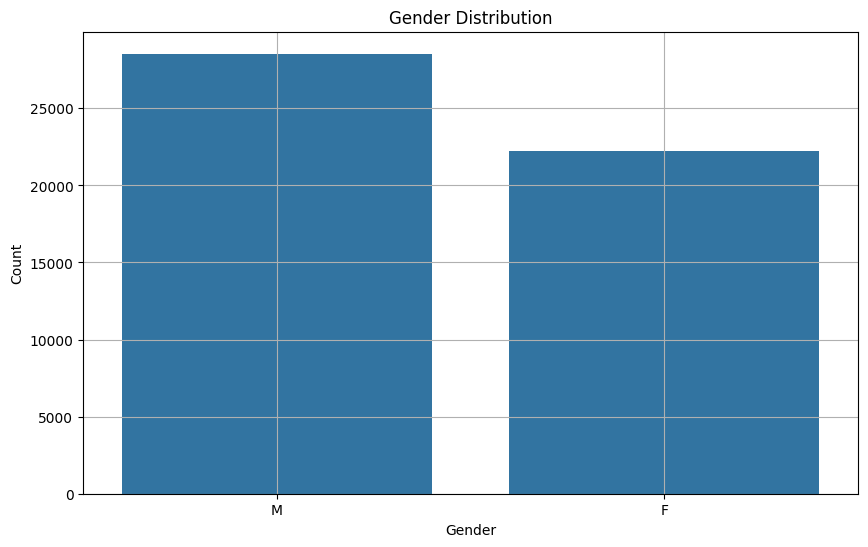

<ipython-input-6-3d06e6db7ca2>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Proportion', y=column_name, data=df, ci=None)


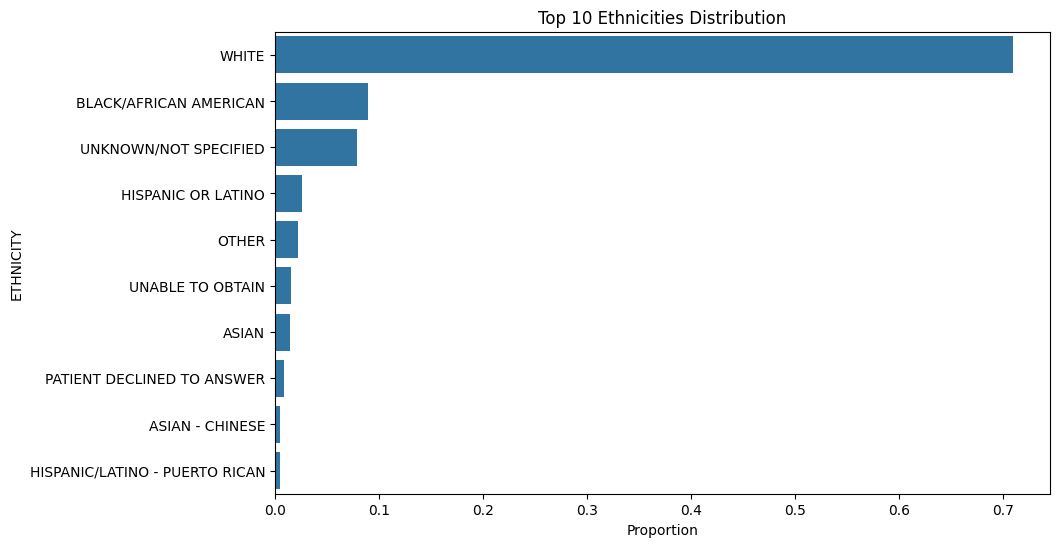

<ipython-input-6-3d06e6db7ca2>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Proportion', y=column_name, data=df, ci=None)


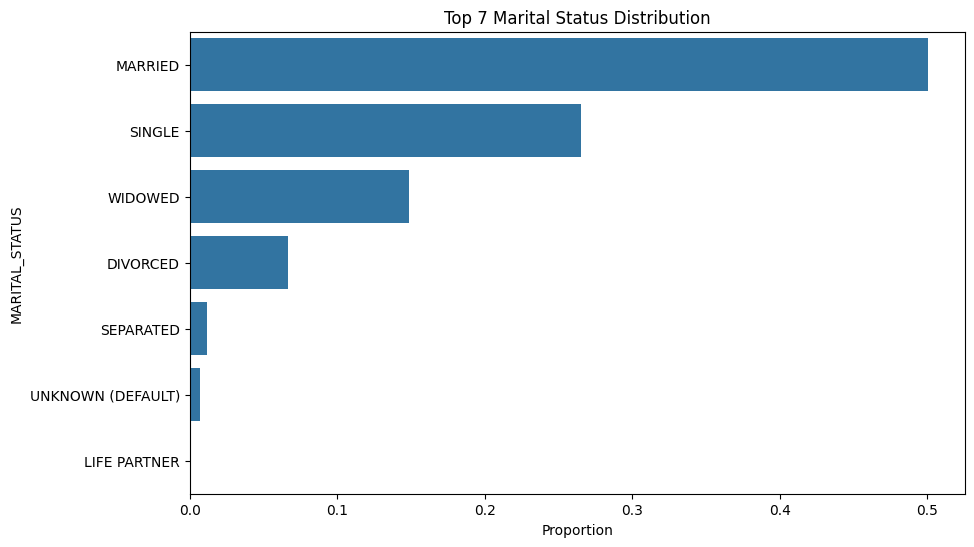

<ipython-input-6-3d06e6db7ca2>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Proportion', y=column_name, data=df, ci=None)


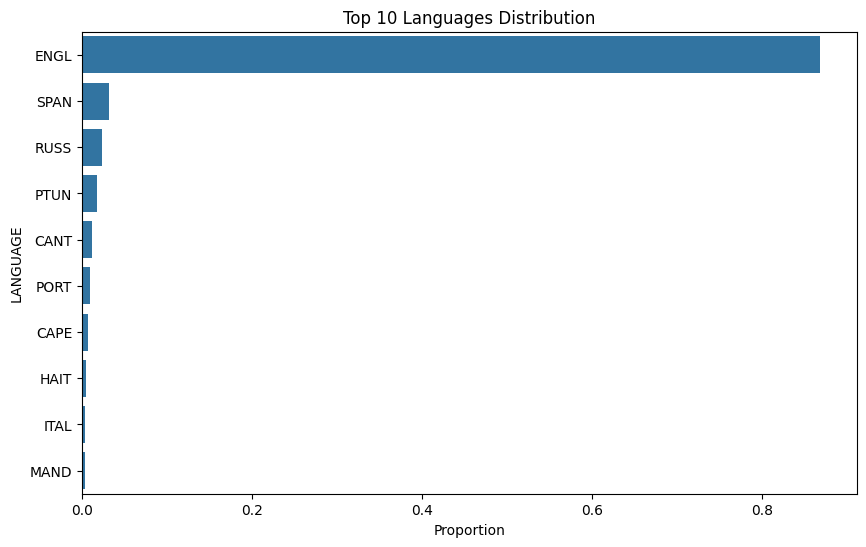

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(other_static_var_df['age_in_years'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', data=other_static_var_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

ethnicity_counts = other_static_var_df['ETHNICITY'].value_counts(normalize=True).reset_index()
ethnicity_counts.columns = ['ETHNICITY', 'Proportion']
marital_status_counts = other_static_var_df['MARITAL_STATUS'].value_counts(normalize=True).reset_index()
marital_status_counts.columns = ['MARITAL_STATUS', 'Proportion']
language_counts = other_static_var_df['LANGUAGE'].value_counts(normalize=True).reset_index()
language_counts.columns = ['LANGUAGE', 'Proportion']

# Selecting the top 10 for each category (if applicable)
top_10_ethnicity = ethnicity_counts.head(10)
top_7_marital_status = marital_status_counts.head(7)
top_10_language = language_counts.head(10)

def plot_category_distribution(df, column_name, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Proportion', y=column_name, data=df, ci=None)
    plt.title(title)
    plt.xlabel('Proportion')
    plt.ylabel(column_name)
    plt.show()

# Plotting the distributions
plot_category_distribution(top_10_ethnicity, 'ETHNICITY', 'Top 10 Ethnicities Distribution')
plot_category_distribution(top_7_marital_status, 'MARITAL_STATUS', 'Top 7 Marital Status Distribution')
plot_category_distribution(top_10_language, 'LANGUAGE', 'Top 10 Languages Distribution')

# <ins> Preprocess Data and Feature Engineering

## Remove Admissions with more than 5 missing variables
* If any timestamp for an admission has more than 5 null values for variables then that admission(treatment plan) is removed for analysis per literature.

Codebase Link: https://github.com/Daponte29/Dynamic-Treatment-Recommendation-Supervised-Reinforcement-Learning-with-Recurrent-Neural-Network/blob/main/Remove_HADM_missing_variables_1.py

## Impute missing variables with KNN

Codebase Link: https://github.com/Daponte29/Dynamic-Treatment-Recommendation-Supervised-Reinforcement-Learning-with-Recurrent-Neural-Network/blob/main/Impute_missing_var_2.py

## Impute categorical using the statistical mode. One-hot-encode categorical features and create admission labels.

* Note: Normalization will be done independently on the training,validation, and test data after splitting to prevent Data Leakage

Codebase Link: https://github.com/Daponte29/Dynamic-Treatment-Recommendation-Supervised-Reinforcement-Learning-with-Recurrent-Neural-Network/blob/main/Pre_process_matrix_3.py

In [ ]:

df_admission_LABELS = pd.read_csv(raw_data_dir + "Final_Labels.csv")

### Map top perscriptions to Third-LVL ATC Codes from API.

Codebase Link: https://github.com/Daponte29/Dynamic-Treatment-Recommendation-Supervised-Reinforcement-Learning-with-Recurrent-Neural-Network/blob/main/GET_ATC_CODES_API.py

In [ ]:
# Create a dictionary to store code map for ATC_CODES gotten from API
ATC_code_map = {}

# Enumerate over Chosen_ATC codes in third_lvl_atc_codes_df
for index, row in third_lvl_atc_codes_df.iterrows():
    # Extract Chosen_ATC code
    chosen_atc = row['Chosen_ATC']

    # Assign an index to the Chosen_ATC code
    ATC_code_map[chosen_atc] = index
print("ATC_CODE_MAP:",ATC_code_map)

ATC_CODE_MAP: {'B05C': 0, 'B05X': 1, 'C03C': 2, 'C07A': 3, 'S01A': 4, 'B01A': 5, 'A10A': 6, 'A02B': 7, 'A06A': 8, 'N02B': 9, 'N02A': 10, 'D11A': 11, 'A04A': 12, 'N05B': 13, 'R03A': 14, 'C05A': 15, 'C02D': 16, 'R01A': 17, 'N01A': 18, 'H04A': 19, 'A07A': 20, 'N05A': 21, 'A03F': 22, 'N05C': 23, 'C01B': 24, 'A12C': 25, 'D04A': 26, 'A01A': 27, 'C01C': 28, 'A02A': 29, 'C08D': 30, 'J01D': 31, 'N06A': 32, 'H02A': 33, 'J01C': 34, 'C09A': 35, 'C10A': 36, 'A11D': 37, 'V04C': 38, 'A11C': 39, 'C01A': 40, 'G01A': 41, 'C08C': 42, 'S01X': 43, 'S01B': 44, 'N03A': 45, 'B02B': 46, 'V03A': 47, 'J01E': 48, 'S01E': 49, 'B03A': 50, 'M03A': 51, 'L04A': 52, 'J05A': 53, 'S01F': 54, 'M04A': 55, 'C03D': 56, 'A07D': 57, 'R05C': 58, 'C03A': 59, 'G04C': 60, 'H03A': 61, 'J01X': 62, 'R02A': 63, 'A11E': 64, 'H01B': 65, 'C09B': 66, 'H01C': 67, 'J02A': 68, 'N07B': 69, 'C03B': 70, 'C01D': 71, 'A10B': 72, 'R03D': 73, 'N01B': 74, 'C09C': 75, 'B03X': 76, 'N06D': 77, 'B03B': 78, 'D10A': 79, 'M03B': 80, 'R05D': 81, 'R06A': 82,

## Build Necessary Matrices for Treatment Plan of Admissions Needed for The Actor-Critic ML Model Framework----------------------------------------------------------------

Codebase Link: https://github.com/Daponte29/Dynamic-Treatment-Recommendation-Supervised-Reinforcement-Learning-with-Recurrent-Neural-Network/blob/main/Pre_process_matrix_3.py

Check same HADM_ID in final Preprocessed Data

In [ ]:
# Extract the sets of HADM_ID values from each dataset
hadm_ids_time_series = set(time_series_matrices_filtered.keys())
hadm_ids_static = set(static_matrices_filtered.keys())
hadm_ids_labels = set(filtered_df_admission_LABELS['HADM_ID'])

# Check for any discrepancies
discrepancies = {
    'Time Series vs Static': hadm_ids_time_series - hadm_ids_static,
    'Time Series vs Labels': hadm_ids_time_series - hadm_ids_labels,
    'Static vs Labels': hadm_ids_static - hadm_ids_labels
}

# Print discrepancies, if any
for comparison, discrepancy_set in discrepancies.items():
    if discrepancy_set:
        print(f"Discrepancy between {comparison}: {discrepancy_set}")
    else:
        print(f"No discrepancies between {comparison}")

# If there are no discrepancies, it means all datasets have the same set of HADM_ID values


NameError: name 'time_series_matrices_filtered' is not defined

## Final Total Dataset Size and Number of Features

##END OF PROCESS RAW DATA______________________________________________________
### Final Matrices

In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_data_dir = '/content/gdrive/My Drive/Big Data Project/Query_Tables/'
with open(os.path.join(raw_data_dir, 'treatment_matrices.pickle'), 'rb') as handle:
    treatment_matrices = pickle.load(handle)
with open(os.path.join(raw_data_dir, 'time_series_matrices_filtered.pickle'), 'rb') as handle:
    time_series_matrices_filtered = pickle.load(handle)
with open(os.path.join(raw_data_dir, 'static_matrices_filtered.pickle'), 'rb') as handle:
    static_matrices_filtered = pickle.load(handle)
with open(os.path.join(raw_data_dir, 'diagnosis_matrices.pickle'), 'rb') as handle:
    diagnosis_matrices = pickle.load(handle)
filtered_df_admission_LABELS = pd.read_pickle(os.path.join(raw_data_dir, 'filtered_df_admission_LABELS.pkl'))

#num features in each matrix then total feature number

In [ ]:
# Extract the sets of HADM_ID values from each dataset
hadm_ids_time_series = set(time_series_matrices_filtered.keys())
hadm_ids_static = set(static_matrices_filtered.keys())
hadm_ids_labels = set(filtered_df_admission_LABELS['HADM_ID'])

# Check for any discrepancies
discrepancies = {
    'Time Series vs Static': hadm_ids_time_series - hadm_ids_static,
    'Time Series vs Labels': hadm_ids_time_series - hadm_ids_labels,
    'Static vs Labels': hadm_ids_static - hadm_ids_labels
}

# Print discrepancies, if any
for comparison, discrepancy_set in discrepancies.items():
    if discrepancy_set:
        print(f"Discrepancy between {comparison}: {discrepancy_set}")
    else:
        print(f"No discrepancies between {comparison}")

# If there are no discrepancies, it means all datasets have the same set of HADM_ID values

No discrepancies between Time Series vs Static
No discrepancies between Time Series vs Labels
No discrepancies between Static vs Labels


## Final Total Dataset Size and Number of Features *

In [ ]:
# Size of treatment matrices
treatment_matrix_size = treatment_matrices[list(treatment_matrices.keys())[0]].shape
num_treatment_features = treatment_matrix_size[1]
print("Number of Treatment Patient Features:", num_treatment_features)

# Size of time series matrices
time_series_matrix_size = time_series_matrices_filtered[list(time_series_matrices_filtered.keys())[0]].shape
num_time_series_features = time_series_matrix_size[1]
print("Number of Time Series Patient Admission Features:", num_time_series_features)

# Size of static matrices
static_matrix_value = next(iter(static_matrices_filtered.values()))
num_static_features = len(static_matrix_value)
print("Number of Static Patient Admission Features:", num_static_features)

# Size of diagnosis matrices
diagnosis_matrix_value = next(iter(diagnosis_matrices.values()))
num_diagnosis_features = len(diagnosis_matrix_value)
print("Number of Diagnosis Patient Admission Features:", num_diagnosis_features)

# Number of unique admissions in admission labels
num_admissions = len(filtered_df_admission_LABELS)
print("Number of Patient Unique Admissions or Total Dataset Size:", num_admissions)


Number of Treatment Patient Features: 92
Number of Time Series Patient Admission Features: 15
Number of Static Patient Admission Features: 6
Number of Diagnosis Patient Admission Features: 2000
Number of Patient Unique Admissions or Total Dataset Size: 28332


In [ ]:
def intersection(action,lab,demo,label,diag):
  if type(label)!=dict: #this is dataframe
    label=pd.Series(label.LABEL.values, index=label.HADM_ID).to_dict()
  hadm_set=set(action.keys()).intersection(set(lab.keys()),set(demo.keys()),set(label.keys()),set(diag.keys()))
  if hadm_set!=set(action.keys()):
    action = dict(sorted({k: action[k] for k in hadm_set}.items()))
  if hadm_set!=set(lab.keys()):
    lab = dict(sorted({k: lab[k] for k in hadm_set}.items()))
  if hadm_set!=set(demo.keys()):
    demo = dict(sorted({k: demo[k] for k in hadm_set}.items()))
  if hadm_set!=set(label.keys()):
    label = dict(sorted({k: label[k] for k in hadm_set}.items()))
  if hadm_set!=set(diag.keys()):
    diag = dict(sorted({k: diag[k] for k in hadm_set}.items()))
  reward = {}
  for id, actions in action.items():
    if label[id] == 1:
      reward[id] = [-10] * (len(actions))

    elif label[id] == 0:
      reward[id] = [10] * (len(actions))
    else:
      reward[id] = [0] * len(actions)

  return action,lab,demo,label,diag,reward,

action,lab,demo,label,diag,reward=intersection(treatment_matrices,time_series_matrices_filtered,static_matrices_filtered,filtered_df_admission_LABELS,diagnosis_matrices)



In [ ]:
#handcode
for k, v in lab.items():
    if len(v) > len(action[k]):
        lab[k] = v[:len(action[k])]
    elif len(v) < len(action[k]):
        zeros_to_add = np.zeros((len(action[k]) - len(v), v.shape[1]))
        lab[k] = np.concatenate((zeros_to_add,v ), axis=0)


In [ ]:
filtered_actions = {k: v[-8:] for k, v in action.items() if v.shape[0] > 8} #timestamp=8
filtered_lab={k:lab[k][-8:] for k in filtered_actions.keys()}
filtered_demo={k:demo[k] for k in filtered_actions.keys()}
filtered_label={k:label[k] for k in filtered_actions.keys()}
filtered_diag={k:diag[k] for k in filtered_actions.keys()}
filtered_reward={k:reward[k][-8:] for k in filtered_actions.keys()}

## Dataset Class

In [ ]:
from torch.utils.data import Dataset, DataLoader,random_split
import torch
class MedicalDataset(Dataset):
  def __init__(self, disease_dic, demo_dic, lab_result, actions, rewards,label):
    self.dones = {}
    for id, actions_list in actions.items():
        self.dones[id] = [0] * (len(actions_list) - 1) + [1]
    self.dones=list(self.dones.values())
    self.diseases = list(disease_dic.values())
    self.demos = list(demo_dic.values())
    self.states = list(lab_result.values())
    if isinstance(actions, dict):
        self.actions = list(actions.values())
    else:
        self.actions = actions
    self.rewards = list(rewards.values())

    self.new_states = self.states[1:] + [[0] * len(self.states[0])]
  def __len__(self):
    return len(self.demos)

  def __getitem__(self, idx):
    #diseases = self.diseases.iloc[idx].values.astype(np.float32)
    diseases = self.diseases[idx]
    actions = self.actions[idx]
    rewards = self.rewards[idx]
    new_states = self.new_states[idx]
    demos = self.demos[idx]
    states = self.states[idx]
    dones = self.dones[idx]

    return states, actions, rewards, new_states, dones, diseases, demos

data=MedicalDataset(filtered_diag,filtered_demo,filtered_lab,filtered_actions,filtered_reward,filtered_label)
train_data,test_data,valid_data=random_split(data, [0.8, 0.1, 0.1], generator=torch.Generator().manual_seed(42))

In [ ]:
#Normalize Splits  Need to do this for "Dataleakage" concerns due to timeseries problem
#train_data_normalized =

## Specific Collate Function for Data

In [ ]:
from torch.nn.utils.rnn import pad_sequence
def my_collate_fn(batch):
    states, actions, rewards, new_states, dones, diseases, demos = zip(*batch)
    # transfor list to tensor
    states = torch.stack([torch.tensor(s) for s in states])
    actions = torch.stack([torch.tensor(a) for a in actions])
    #states = torch.from_numpy(states).float()
    #actions = torch.from_numpy(actions).float()
    # 对于 rewards 和 dones，由于它们是变长的，我们可以将它们转换为张量
    rewards = [torch.tensor(r) for r in rewards]
    dones = [torch.tensor(d) for d in dones]

    # 对 diseases 和 demos 进行相同的处理
    diseases = torch.stack([torch.tensor(d) for d in diseases])
    demos = torch.stack([torch.tensor(d) for d in demos])
    #diseases = torch.from_numpy(diseases).float()
    #demos = torch.from_numpy(demos).float()
    # new_states 也是序列数据，需要和 states 一样处理
        # 创建new_states：使用前7个时间戳并添加一个全0的时间戳
    new_states = []
    for s in states:
        new_state = s[:-1]  # 获取前7个时间戳
        zero_timestamp = torch.zeros_like(s[0])  # 创建一个与单个时间戳形状相同、值全为0的时间戳
        new_state_with_zero = torch.cat((new_state, zero_timestamp.unsqueeze(0)), dim=0)  # 添加全0时间戳
        new_states.append(new_state_with_zero)

    new_states = torch.stack(new_states)  # 将列表转换回tensor
    #new_states = torch.stack([torch.tensor(s) for s in new_states])
    # 如果你的序列长度不一致，你可能需要对 states, actions, new_states 使用 pad_sequence
    # 例如：states = pad_sequence(states, batch_first=True)
    # 注意：pad_sequence 接受的是一个张量列表，并返回所有序列填充到最长序列长度的单个张量。

    return states, actions, pad_sequence(rewards, batch_first=True), new_states, pad_sequence(dones, batch_first=True), diseases, demos

### Load the DataLoader Pytorch data for train,test,validate

In [ ]:
BATCH_SIZE=64
train_loader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True,collate_fn=my_collate_fn)
test_loader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True,collate_fn=my_collate_fn)
valid_loader=DataLoader(dataset=valid_data, batch_size=BATCH_SIZE, shuffle=True,collate_fn=my_collate_fn)

## Model Summary

The developed model for medical decision-making comprises two primary components: an Actor Network and a Critic Network, designed to work in tandem to optimize treatment strategies based on medical data inputs.

### Model Architecture
- **Actor Network:** Utilizes a combination of LSTM, linear, and embedding layers to process laboratory results, demographic data, and disease information. It incorporates an LSTM layer with 180 hidden units to capture temporal dependencies in lab results, linear layers to process demographic data and disease embeddings, and uses a sigmoid activation function to generate action probabilities.
- **Critic Network:** Mirrors the Actor Network in its use of LSTM, linear, and embedding layers but includes an additional action input layer. This network assesses the value of the actions proposed by the Actor Network, guiding the actor towards more beneficial decisions.
- **Dimension Details:** Both networks operate on time-series data with 8 time stamps, reflecting the dynamic nature of medical treatment over time.

### Training Objectives
- **Loss Functions:** The Critic Network utilizes Mean Squared Error (MSE) for loss calculation, reflecting the deviation between expected and predicted Q-values. The Actor Network's loss is a combination of the negative mean of the Critic's assessments (encouraging actions with higher expected returns) and a supervised learning component using cross-entropy (guiding the actor towards specific desirable actions).
- **Optimizers:** Adam optimizer with learning rates of 0.001 for the Actor and 0.005 for the Critic, facilitating the gradient descent process.
- **Regularization Techniques:** Dropout is applied within both networks to prevent overfitting, ensuring the model's generalizability.

### Additional Considerations
- **Model Dynamics:** The model uses a soft update strategy for the target networks (both actor and critic), controlled by a parameter `TAU`, to gradually integrate the learned weights, stabilizing the learning process.
- **Evaluation Metrics:** Jaccard score and accuracy are used for model evaluation, measuring the similarity between the predicted and actual treatments and the correctness of the action predictions, respectively.

### Implementation Details
- The Actor and Critic networks are implemented as PyTorch classes, encapsulating the network architecture and forward propagation logic.
- Training and evaluation functions handle the iterative learning process and performance assessment, incorporating mechanisms for dynamic adjustment based on feedback from the Critic Network.
- Data loaders facilitate batch processing of time-series medical data, accommodating the complex structure of patient records.

### Model Training and Validation
- The model underwent iterative training with a focus on minimizing the Critic's loss while maximizing the Actor's effectiveness in proposing beneficial actions.
- Validation was conducted on a separate dataset, ensuring that the model's performance is robust and not merely reflective of the training data characteristics.

This model represents a sophisticated approach to leveraging deep learning for decision-making in medical contexts, offering a nuanced understanding of patient data over time and promising avenues for personalized treatment strategies.


## Actor Network Class

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

HIDDEN1_UNITS = 40
HIDDEN2_UNITS = 180
class ActorNetwork(nn.Module):
    def __init__(self,TAU,time_stamp, med_size, lab_size, demo_size, di_size):
        super(ActorNetwork, self).__init__()
        #self.BATCH_SIZE = BATCH_SIZE
        self.TAU = TAU
        #self.LEARNING_RATE = LEARNING_RATE
        #self.epsilon = epsilon
        self.time_stamp = time_stamp
        self.med_size = med_size
        self.lab_size = lab_size
        self.demo_size = demo_size
        self.di_size = di_size

        # Network layers
        self.lstm = nn.LSTM(input_size=lab_size, hidden_size=HIDDEN2_UNITS, batch_first=True)
        self.demo_dense = nn.Linear(demo_size, HIDDEN1_UNITS)
        self.disease_embedding = nn.Embedding(2001, HIDDEN1_UNITS, padding_idx=0)
        self.dense_time_distributed = nn.Linear(HIDDEN2_UNITS + HIDDEN1_UNITS*2, med_size)
        self.output_activation = nn.Sigmoid()


    def forward(self, lab_test, disease, demo):
        demo=demo.float()
        demo = F.prelu(self.demo_dense(demo), weight=torch.tensor([0.25]))
        demo = demo.unsqueeze(1).repeat(1, self.time_stamp, 1)

        disease_emb = self.disease_embedding(disease.long())
        disease_avg = self.avg_emb(disease_emb)
        disease_repeated = disease_avg.unsqueeze(1).repeat(1, self.time_stamp, 1)

        lstm_out, _ = self.lstm(lab_test)
        combined = torch.cat([lstm_out, disease_repeated, demo], dim=-1) #哪个维度拼接
        output = self.dense_time_distributed(combined)
        output = self.output_activation(output)
        return output

    @staticmethod
    def avg_emb(emb, mask=None):
        if mask is None:
            return torch.mean(emb, dim=1)
        else:
            mask = mask.float().unsqueeze(-1)
            emb_masked = emb * mask
            sum_emb = torch.sum(emb_masked, dim=1)
            sum_mask = torch.clamp(torch.sum(mask, dim=1), min=1e-9)
            avg_emb = sum_emb / sum_mask
            return avg_emb

    def train_model(self, states, disease, demos, label, action_grads, sw):
        self.train()
        self.optimizer.zero_grad()
        outputs = self(states, disease, demos)
        loss = self.criterion(outputs, label)
        loss.backward()
        self.optimizer.step()

    def target_train(self, target_model):
        for target_param, param in zip(target_model.parameters(), self.parameters()):
            target_param.data.copy_(self.TAU * param.data + (1.0 - self.TAU) * target_param.data)


## Critic Netowork Class

In [ ]:
class CriticNetwork(nn.Module):
    def __init__(self, TAU,time_stamp, med_size, lab_size, demo_size, di_size):
        super(CriticNetwork, self).__init__()
        self.BATCH_SIZE = BATCH_SIZE
        self.TAU = TAU
        #self.LEARNING_RATE = LEARNING_RATE
        #self.epsilon = epsilon
        self.time_stamp = time_stamp
        self.med_size = med_size
        self.lab_size = lab_size
        self.demo_size = demo_size
        self.di_size = di_size
        #self.action_dim = action_dim

        # Network layers
        self.dropout_lab_test = nn.Dropout(p=0.5)
        self.demo_dense = nn.Linear(demo_size, HIDDEN1_UNITS)
        self.demo_prelu = nn.PReLU()
        self.disease_embedding = nn.Embedding(2001, HIDDEN1_UNITS, padding_idx=0)
        self.lstm = nn.LSTM(lab_size, HIDDEN2_UNITS, batch_first=True)
        self.action_dense_time_distributed = nn.Linear(med_size, HIDDEN2_UNITS + 2*HIDDEN1_UNITS)
        self.final_dense_time_distributed = nn.Linear(HIDDEN2_UNITS + 2*HIDDEN1_UNITS, 1)

    def forward(self, lab_test, action, disease, demo):
        demo = self.demo_prelu(self.demo_dense(demo))
        demo_repeated = demo.unsqueeze(1).repeat(1, self.time_stamp, 1)

        # Disease embedding and repeat
        disease_emb = self.disease_embedding(disease.long())
        disease_avg = self.avg_emb(disease_emb)
        disease_repeated = disease_avg.unsqueeze(1).repeat(1, self.time_stamp, 1)

        # LSTM for lab_test
        lab_test = self.dropout_lab_test(lab_test)
        lstm_out, _ = self.lstm(lab_test)

        # Action
        #action_transformed = action.contiguous().view(-1, action.shape[-1])
        #action_transformed = self.action_dense_time_distributed(action_transformed)
        action_transformed = self.action_dense_time_distributed(action)
        #action_transformed = action_transformed.view(-1, self.time_stamp, HIDDEN2_UNITS)
        combined = torch.cat([lstm_out, disease_repeated, demo_repeated], dim=2)  # Concatenate along the feature dimension

        h2 = combined + action_transformed
        #h2 = h2.contiguous().view(-1, HIDDEN2_UNITS)  # Flatten to apply Dense
        output = self.final_dense_time_distributed(h2)
        return output

    @staticmethod
    def avg_emb(emb, mask=None):
        if mask is None:
            return torch.mean(emb, dim=1)
        else:
            mask = mask.float().unsqueeze(-1)
            emb_masked = emb * mask
            sum_emb = torch.sum(emb_masked, dim=1)
            sum_mask = torch.clamp(torch.sum(mask, dim=1), min=1e-9)
            avg_emb = sum_emb / sum_mask
            return avg_emb

## Basic (Long Short-Term Memory) LSTM RNN-type Model for Comparison

In [ ]:
class Basic_LSTM(nn.Module):
    def __init__(self,TAU,time_stamp, med_size, lab_size, demo_size, di_size):
        super(Basic_LSTM, self).__init__()
        #self.BATCH_SIZE = BATCH_SIZE
        self.TAU = TAU
        #self.LEARNING_RATE = LEARNING_RATE
        #self.epsilon = epsilon
        self.time_stamp = time_stamp
        self.med_size = med_size
        self.lab_size = lab_size
        self.demo_size = demo_size
        self.di_size = di_size

        # Network layers
        #self.lstm = nn.LSTM(input_size=lab_size, hidden_size=HIDDEN2_UNITS, batch_first=True)
        #self.demo_dense = nn.Linear(demo_size, HIDDEN1_UNITS)
        #self.disease_embedding = nn.Embedding(2001, HIDDEN1_UNITS, padding_idx=0)
        self.dense_time_distributed = nn.Linear(HIDDEN2_UNITS + HIDDEN1_UNITS*2, med_size)
        self.output_activation = nn.Sigmoid()
        self.M1=nn.Linear(di_size,HIDDEN1_UNITS)
        self.M2=nn.Linear(demo_size,HIDDEN1_UNITS)
        self.L1=nn.LSTM(input_size=lab_size, hidden_size=HIDDEN2_UNITS, batch_first=True)

    def forward(self, lab_test, disease, demo):
        demo=demo.float()
        demo = F.prelu(self.M2(demo), weight=torch.tensor([0.25]))
        demo = demo.unsqueeze(1).repeat(1, self.time_stamp, 1)

        disease=disease.float()
        disease=F.prelu(self.M1(disease), weight=torch.tensor([0.25]))
        disease_repeated = disease.unsqueeze(1).repeat(1, self.time_stamp, 1)

        lstm_out, _ = self.L1(lab_test)
        combined = torch.cat([lstm_out, disease_repeated, demo], dim=-1) #哪个维度拼接
        output = self.dense_time_distributed(combined)
        output = self.output_activation(output)
        return output

    @staticmethod
    def avg_emb(emb, mask=None):
        if mask is None:
            return torch.mean(emb, dim=1)
        else:
            mask = mask.float().unsqueeze(-1)
            emb_masked = emb * mask
            sum_emb = torch.sum(emb_masked, dim=1)
            sum_mask = torch.clamp(torch.sum(mask, dim=1), min=1e-9)
            avg_emb = sum_emb / sum_mask
            return avg_emb

    def train_model(self, states, disease, demos, label, action_grads, sw):
        self.train()
        self.optimizer.zero_grad()
        outputs = self(states, disease, demos)
        loss = self.criterion(outputs, label)
        loss.backward()
        self.optimizer.step()

    def target_train(self, target_model):
        for target_param, param in zip(target_model.parameters(), self.parameters()):
            target_param.data.copy_(self.TAU * param.data + (1.0 - self.TAU) * target_param.data)

## Train Block for Actor-Critic SRL-RNN Model

In [ ]:
import os
import time
import numpy as np
import torch
from sklearn.metrics import jaccard_score,accuracy_score
import torch
import numpy as np

class AverageMeter(object):
	"""Computes and stores the average and current value"""

	def __init__(self):
		self.reset()

	def reset(self):
		self.val = 0
		self.avg = 0
		self.sum = 0
		self.count = 0

	def update(self, val, n=1):
		self.val = val
		self.sum += val * n
		self.count += n
		self.avg = self.sum / self.count


def compute_batch_accuracy(output, target):
	"""Computes the accuracy for a batch"""
	with torch.no_grad():

		batch_size = target.size(0)
		_, pred = output.max(1)
		correct = pred.eq(target).sum()

		return correct * 100.0 / batch_size

def soft_update(target, source, tau):
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(target_param.data *tau  + param.data * (1.0 - tau))

def train(actor, critic,target_actor,target_critic, actor_optimizer, critic_optimizer, dataloader, gamma=0.99, tau=0.001,epsilon=0.5):
	actor.train()
	critic.train()

	total_actor_loss = 0.0
	total_critic_loss = 0.0
	all_preds = []
	all_targets = []
	max_reward=30
	rl_loss=0.0
	sl_loss=0.0
	for states, actions, rewards, next_states, dones, diseases, demos in dataloader:
	# 注意：此处应从你的数据加载器中获取相应的tensor数据
		states=states.float()
		actions=actions.float()
		next_states=next_states.float()
		demos=demos.float()
		actions=actions.float()
	# update Critic
		with torch.no_grad():
				#next_actions = target_actor(next_states,diseases,demos)
				#next_q_values = target_critic(next_states, next_actions,diseases,demos)
				next_actions = actor(next_states,diseases,demos)
				next_q_values = critic(next_states, next_actions,diseases,demos)
				rewards = rewards.unsqueeze(-1)  # 形状变为 [batch_size, sequence_length, 1]
				dones = dones.unsqueeze(-1)  # 形状变为 [batch_size, sequence_length, 1]
				# 将 rewards 和 dones 的列表转换为张量
				#rewards_tensor = torch.stack(rewards, dim=1).unsqueeze(-1)  # 形状变为 [32, 8, 1]
				#dones_tensor = torch.stack(dones, dim=1).unsqueeze(-1)  # 形状变为 [32, 8, 1]
				# 确保数据类型和设备匹配
				#rewards_tensor = rewards_tensor.to(next_q_values.device, dtype=torch.float32)
				#dones_tensor = dones_tensor.to(next_q_values.device, dtype=torch.float32)
				expected_q_values = rewards + gamma * (1 - dones) * next_q_values
				expected_q_values[expected_q_values > max_reward] = max_reward
				expected_q_values[expected_q_values < -max_reward] = -max_reward

		current_q_values = critic(states, actions,diseases,demos)
		critic_loss = F.mse_loss(current_q_values, expected_q_values)
		critic_optimizer.zero_grad()
		critic_loss.backward()
		critic_optimizer.step()
		total_critic_loss += critic_loss.item()
		#soft_update(target_critic, critic, tau)
		# 更新Actor
		predicted_actions = actor(states,diseases,demos)
		actor_loss = (-critic(states, predicted_actions,diseases,demos)).mean()
		supervised_loss_function = nn.BCELoss()
		supervised_loss = supervised_loss_function(predicted_actions, actions) #F.cross_entropy(predicted_actions, actions)  # 监督学习部分的损失nn.BCELoss()可能需要这个
		total_loss = (1-epsilon)*actor_loss + epsilon*supervised_loss # 总损失
		actor_optimizer.zero_grad()
		total_loss.backward()
		actor_optimizer.step()
		total_actor_loss += total_loss.item()
		rl_loss+=actor_loss.item()
		sl_loss+=supervised_loss.item()
		# 为Jaccard分数收集预测和目标
		#all_preds.extend(predicted_actions.detach().cpu().numpy())
		preds = (predicted_actions > 0.5).float()
		all_preds.extend(preds.cpu().numpy())
		#all_targets.extend(actions.cpu().numpy())
		all_targets.extend(actions.cpu().numpy())
		#soft_update(target_actor, actor, tau)
	avg_actor_loss = total_actor_loss / len(dataloader)
	avg_critic_loss = total_critic_loss / len(dataloader)
	avg_rl_loss = rl_loss / len(dataloader)
	avg_sl_loss = sl_loss / len(dataloader)
	all_preds = np.round(np.vstack(all_preds))  # 将概率预测转换为二进制标签
	all_targets = np.vstack(all_targets)
	avg_jaccard = jaccard_score(all_targets, all_preds, average='samples')
	return avg_actor_loss, avg_critic_loss, avg_jaccard,avg_rl_loss,avg_sl_loss




def evaluate(actor,critic, dataloader,epsilon=0.9):
		actor.eval()  # 将模型设置为评估模式
		total_loss=0.0
		all_preds = []
		all_targets = []
		supervised_loss_function = nn.BCELoss()
		with torch.no_grad():  # 在评估过程中不计算梯度
				for states, actions, rewards, next_states, dones, diseases, demos in dataloader:
						# 生成预测
						states = states.float()
						diseases = diseases.float()
						demos=demos.float()
						predicted_actions = actor(states,diseases,demos).float()
						actions=actions.float()
						actor_loss = -critic(states, predicted_actions,diseases,demos).mean()
						supervised_loss = supervised_loss_function(predicted_actions, actions)
						#loss = (1-epsilon)*actor_loss + epsilon*supervised_loss
						loss=supervised_loss
						total_loss+=loss.item()
						# 将连续的概率输出转换为二进制标签
						preds = (predicted_actions > 0.5).float()
						all_preds.extend(preds.cpu().numpy())
						all_targets.extend(actions.cpu().numpy())

		# 计算Jaccard分数
		all_preds = np.vstack(all_preds)
		all_targets = np.vstack(all_targets)
		avg_loss = total_loss / len(dataloader)
		# 注意：jaccard_score函数期望二维输入时为标签二值化的形式
		# 如果actions已经是二进制标签，则直接计算即可
		jaccard = jaccard_score(all_targets, all_preds, average='samples')  # 使用'samples'平均来处理多标签分类
		accuracies = [accuracy_score(all_targets[i], all_preds[i]) for i in range(len(all_targets))]
		accuracy = np.mean(accuracies)
		return avg_loss,jaccard,accuracy,all_preds,all_targets

## Train Block for Basic LSTM RNN-Type Model

In [ ]:
def BL_train(BL, BL_optimizer, dataloader, gamma=0.99, tau=0.001,epsilon=0.2):
  BL.train()

  total_loss = 0.0
  all_preds = []
  all_targets = []
  loss_function = nn.BCELoss()
  for states, actions, rewards, next_states, dones, diseases, demos in dataloader:
  # 注意：此处应从你的数据加载器中获取相应的tensor数据
    states=states.float()
    actions=actions.float()
    next_states=next_states.float()
    demos=demos.float()
    # 更新Actor
    predicted_actions = BL(states,diseases,demos)
    loss = loss_function(predicted_actions, actions)#F.cross_entropy(predicted_actions, actions)  # 监督学习部分的损失nn.BCELoss()可能需要这个
    BL_optimizer.zero_grad()
    loss.backward()
    BL_optimizer.step()
    total_loss += loss.item()
    # 为Jaccard分数收集预测和目标
    #all_preds.extend(predicted_actions.detach().cpu().numpy())
    preds = (predicted_actions > 0.5).float()
    all_preds.extend(preds.cpu().numpy())
    #all_targets.extend(actions.cpu().numpy())
    all_targets.extend(actions.cpu().numpy())
    #soft_update(target_actor, actor, tau)

  avg_loss = total_loss / len(dataloader)
  all_preds = np.round(np.vstack(all_preds))  # 将概率预测转换为二进制标签
  all_targets = np.vstack(all_targets)
  avg_jaccard = jaccard_score(all_targets, all_preds, average='samples')
  return avg_loss, avg_jaccard




def BL_evaluate(BL, dataloader):
    BL.eval()  # 将模型设置为评估模式
    total_loss=0.0
    all_preds = []
    all_targets = []
    loss_function = nn.BCELoss()
    with torch.no_grad():  # 在评估过程中不计算梯度
        for states, actions, rewards, next_states, dones, diseases, demos in dataloader:
            # 生成预测
            states = states.float()
            diseases = diseases.float()
            demos=demos.float()
            actions = actions.float()
            predicted_actions = BL(states,diseases,demos).float()
            loss = loss_function(predicted_actions, actions)
            total_loss += loss.item()
            # 将连续的概率输出转换为二进制标签
            preds = (predicted_actions > 0.5).float()
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(actions.cpu().numpy())

    # 计算Jaccard分数
    all_preds = np.vstack(all_preds)
    all_targets = np.vstack(all_targets)
    avg_loss = total_loss / len(dataloader)
    # 注意：jaccard_score函数期望二维输入时为标签二值化的形式
    # 如果actions已经是二进制标签，则直接计算即可
    jaccard = jaccard_score(all_targets, all_preds, average='samples')  # 使用'samples'平均来处理多标签分类
    accuracies = [accuracy_score(all_targets[i], all_preds[i]) for i in range(len(all_targets))]
    accuracy = np.mean(accuracies)
    return avg_loss,jaccard,accuracy,all_preds,all_targets

In [ ]:
USE_CUDA = False  # Set 'True' if you want to use GPU


device = torch.device("cuda" if torch.cuda.is_available() and USE_CUDA else "cpu")
torch.manual_seed(1)
if device.type == "cuda":
	torch.backends.cudnn.deterministic = True
	torch.backends.cudnn.benchmark = False


## Start Training of SRL-RNN Model

In [ ]:
import os

# 定义保存模型的路径
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)  # 确保文件夹存在
actor_model_path = os.path.join(model_dir, 'best_actor.pth')
critic_model_path = os.path.join(model_dir, 'best_critic.pth')
target_actor_model_path = os.path.join(model_dir, 'best_target_actor.pth')
target_critic_model_path = os.path.join(model_dir, 'best_targetcritic.pth')
NUM_EPOCHS=30
BATCH_SIZE=32
TAU=0.001
# Model initialization
actor = ActorNetwork(TAU,time_stamp=8, med_size=train_data[0][1].shape[1], lab_size=train_data[0][0].shape[1], demo_size=train_data[0][6].shape[0], di_size=train_data[0][5].shape[0]) # Initialize with appropriate parameters
critic = CriticNetwork(TAU,time_stamp=8, med_size=train_data[0][1].shape[1], lab_size=train_data[0][0].shape[1], demo_size=train_data[0][6].shape[0], di_size=train_data[0][5].shape[0]) # Initialize with appropriate parameters
target_actor = ActorNetwork(TAU,time_stamp=8, med_size=train_data[0][1].shape[1], lab_size=train_data[0][0].shape[1], demo_size=train_data[0][6].shape[0], di_size=train_data[0][5].shape[0]) # Initialize with appropriate parameters
target_critic = CriticNetwork(TAU,time_stamp=8, med_size=train_data[0][1].shape[1], lab_size=train_data[0][0].shape[1], demo_size=train_data[0][6].shape[0], di_size=train_data[0][5].shape[0]) # Initialize with appropriate parameters
target_actor.load_state_dict(actor.state_dict())
target_critic.load_state_dict(critic.state_dict())

actor.to(device)
critic.to(device)
target_actor.to(device)
target_critic.to(device)
actor_optimizer = optim.Adam(actor.parameters(),lr=0.001)
critic_optimizer = optim.Adam(critic.parameters(),lr=0.005)
best_jaccard = 0.0
train_actor_losses, train_critic_losses,train_jaccards = [], [],[]
valid_losses, valid_accuracies,valid_jaccards = [], [],[]
avg_rl_losses,avg_sl_losses=[],[]
for epoch in range(NUM_EPOCHS):
	train_actor_loss, train_critic_loss, train_jaccard,avg_rl_loss,avg_sl_loss = train(actor, critic,target_actor,target_critic, actor_optimizer, critic_optimizer, train_loader, gamma=0.99, tau=0.001)
	valid_loss,valid_jaccard,valid_accuracy,all_preds,all_targets = evaluate(actor,critic, valid_loader)

	train_actor_losses.append(train_actor_loss)
	valid_losses.append(valid_loss)

	train_critic_losses.append(train_critic_loss)
	#valid_critic_losses.append(valid_critic_loss)
	valid_accuracies.append(valid_accuracy)
	train_jaccards.append(train_jaccard)
	valid_jaccards.append(valid_jaccard)
	avg_rl_losses.append(avg_rl_loss)
	avg_sl_losses.append(avg_sl_loss)
	is_best = valid_jaccard > best_jaccard  # let's keep the model that has the best accuracy, but you can also use another metric.
	if is_best:
		best_jaccard = valid_jaccard
		torch.save(actor, actor_model_path, _use_new_zipfile_serialization=False)
		torch.save(critic, critic_model_path, _use_new_zipfile_serialization=False)
		torch.save(target_actor, target_actor_model_path, _use_new_zipfile_serialization=False)
		torch.save(target_critic, target_critic_model_path, _use_new_zipfile_serialization=False)
best_actor = torch.load(actor_model_path)

/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type ActorNetwork. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type CriticNetwork. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type ActorNetwork. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type CriticNetwork. It won't be checked for correctness upon loading.
  warnings.w

## Start Training of Basic LSTM RNN-Type Model

In [ ]:
import os

# 定义保存模型的路径
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)  # 确保文件夹存在
BL_path = os.path.join(model_dir, 'best_BL.pth')
NUM_EPOCHS=30
BATCH_SIZE=32
TAU=0.001
# Model initialization
BL = Basic_LSTM(TAU,time_stamp=8, med_size=train_data[0][1].shape[1], lab_size=train_data[0][0].shape[1], demo_size=train_data[0][6].shape[0], di_size=train_data[0][5].shape[0]) # Initialize with appropriate parameters

BL.to(device)
BL_optimizer = optim.Adam(BL.parameters(),lr=0.001)
BL_best_jaccard = 0.0
BL_train_losses,BL_train_jaccards = [], []
BL_valid_losses,BL_valid_jaccards,BL_valid_accuracies = [], [],[]
for epoch in range(NUM_EPOCHS):
  BL_train_loss, BL_train_jaccard = BL_train(BL, BL_optimizer, train_loader, gamma=0.99, tau=0.001)
  BL_valid_loss,BL_valid_jaccard,BL_valid_accuracy,BL_all_preds,BL_all_targets = BL_evaluate(BL, valid_loader)

  BL_train_losses.append(BL_train_loss)
  BL_valid_losses.append(BL_valid_loss)
  BL_valid_accuracies.append(BL_valid_accuracy)
  BL_train_jaccards.append(BL_train_jaccard)
  BL_valid_jaccards.append(BL_valid_jaccard)
  is_best = BL_valid_jaccard > BL_best_jaccard  # let's keep the model that has the best accuracy, but you can also use another metric.
  if is_best:
    BL_best_jaccard = BL_valid_jaccard
    torch.save(BL, BL_path, _use_new_zipfile_serialization=False)

best_BL = torch.load(BL_path)

/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type Basic_LSTM. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type Basic_LSTM. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type Basic_LSTM. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:662: UserWarning: Couldn't retrieve source code for container of type Basic_LSTM. It won't be checked for correctness upon loading.
  warnings.warn("Could

In [ ]:
for states, actions, rewards, next_states, dones, diseases, demos in train_loader:
  print(next_states.size())
  print(diseases.size())
  print(demos.size())
  break

torch.Size([64, 8, 15])
torch.Size([64, 2000])
torch.Size([64, 6])


In [ ]:
print(all_preds[1])
print(all_targets[1])
jaccard_score(all_targets[1],all_preds[1])

In [ ]:
sum(all_preds[1])

In [ ]:
intersection = np.logical_and(all_targets[1], all_preds[1])
union = np.logical_or(all_targets[1], all_preds[1])

intersection_size = np.sum(intersection)
union_size = np.sum(union)

print("Intersection size:", intersection_size)
print("Union size:", union_size)

In [ ]:
intersection

In [ ]:
train_actor_losses

## Result SRL-RNN Model

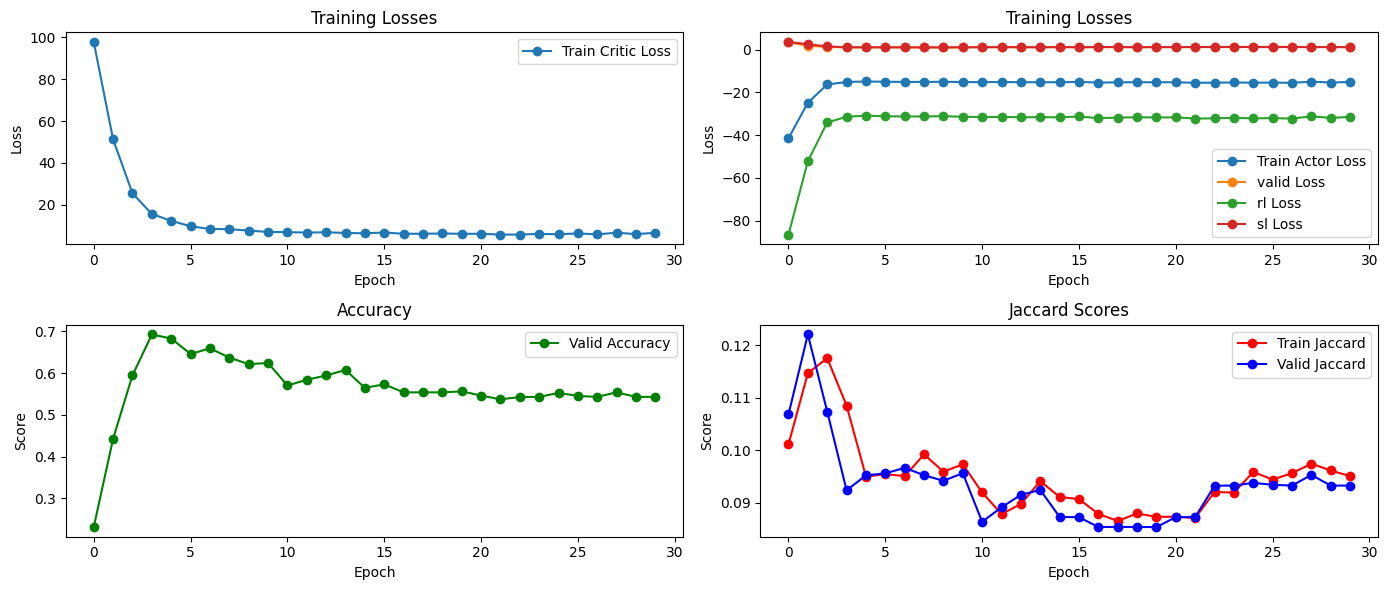

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

# 画图
plt.subplot(2, 2, 1)
plt.plot(train_critic_losses, label='Train Critic Loss', marker='o')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_actor_losses, label='Train Actor Loss', marker='o')
plt.plot(valid_losses, label='valid Loss', marker='o')
plt.plot(avg_rl_losses, label='rl Loss', marker='o')
plt.plot(avg_sl_losses, label='sl Loss', marker='o')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(valid_accuracies, label='Valid Accuracy', marker='o', color='green')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(train_jaccards, label='Train Jaccard', marker='o', color='red')
plt.plot(valid_jaccards, label='Valid Jaccard', marker='o', color='blue')
plt.title('Jaccard Scores')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

* It is clear that improvment is not seen or is worse after a short amount of epochs(around 4). This is partly due to the Actor loss function consisting of two terms that contain positive and negative values that result in the losses hovering around 0. The paper did not mention how to solve this issue in the Actor-Critic framework. The unexplained data preprocessing steps additionally contributes to these poor results.
* The ambigious reward function is also one factors cause this problem. We do not make sure what the situation that reward is 0 and the reward only produce at the final timestamp or all of time stamps.
* High accuracy and low Jaccard score can happen when the model accurately predicts the majority class but struggles with minority classes, especially in imbalanced datasets. Accuracy measures overall correctness, while the Jaccard score, which considers the intersection over union of predicted and true labels, penalizes for misclassification of minority classes, leading to a lower score despite high accuracy. Thus it follows the trend that the major issue in this replication can be seen from the innacurate explanation of preprocessing the data, leading to data quality issues.

## Result Basic LSTM RNN-Type Model

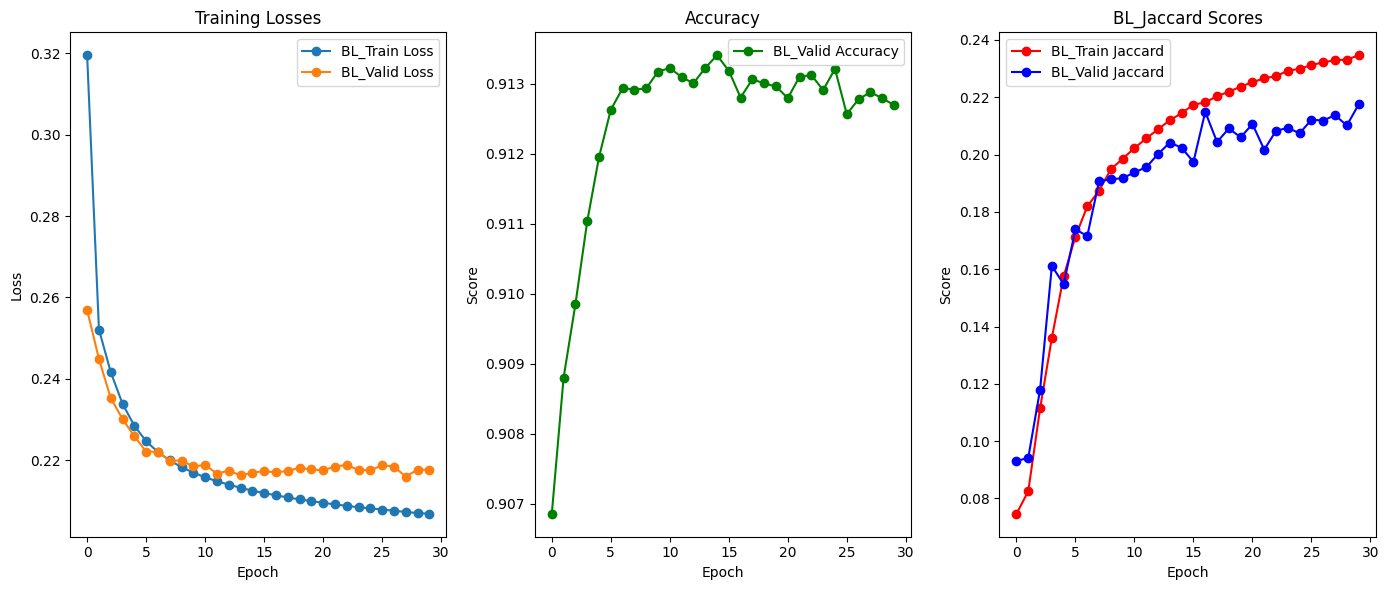

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

# 画图
plt.subplot(1, 3, 1)
plt.plot(BL_train_losses, label='BL_Train Loss', marker='o')
plt.plot(BL_valid_losses, label='BL_Valid Loss', marker='o')

plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(BL_valid_accuracies, label='BL_Valid Accuracy', marker='o', color='green')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(BL_train_jaccards, label='BL_Train Jaccard', marker='o', color='red')
plt.plot(BL_valid_jaccards, label='BL_Valid Jaccard', marker='o', color='blue')
plt.title('BL_Jaccard Scores')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

* The Loss function in the Basic LSTM model shows a higher epoch(around 10) as opposed to the SRL-RNN model and a much higher accuracy and Jaccard Score are seen at the same epoch as SRL-RNN.
* That's may because the actor loss is combined by two part, one part is negative and another part is positive and they have different scaler. This evidence suggests again that data quality issues resulting from improper processing not explained in the literature. The negative loss function will cause model cannot learn well from data.

In [ ]:
best_actor.eval()
all_preds = []
all_targets = []

with torch.no_grad():  # 在评估过程中不计算梯度
    for states, actions, rewards, next_states, dones, diseases, demos in test_loader:
        # 生成预测
        states = states.float()
        diseases = diseases.float()
        demos=demos.float()
        predicted_actions = best_actor(states,diseases,demos)

        # 将连续的概率输出转换为二进制标签
        preds = (predicted_actions > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(actions.cpu().numpy())

# 计算Jaccard分数
all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

# 注意：jaccard_score函数期望二维输入时为标签二值化的形式
# 如果actions已经是二进制标签，则直接计算即可
jaccard = jaccard_score(all_targets, all_preds, average='samples')  # 使用'samples'平均来处理多标签分类
#accuracies = [accuracy_score(all_targets[i], all_preds[i]) for i in range(len(all_targets))]
#accuracy = np.mean(accuracies)

In [ ]:

jaccard

0.11823728571533411

In [ ]:
best_BL.eval()
all_preds = []
all_targets = []

with torch.no_grad():  # 在评估过程中不计算梯度
    for states, actions, rewards, next_states, dones, diseases, demos in test_loader:
        # 生成预测
        states = states.float()
        diseases = diseases.float()
        demos=demos.float()
        predicted_actions = best_BL(states,diseases,demos)

        # 将连续的概率输出转换为二进制标签
        preds = (predicted_actions > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(actions.cpu().numpy())

# 计算Jaccard分数
all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

# 注意：jaccard_score函数期望二维输入时为标签二值化的形式
# 如果actions已经是二进制标签，则直接计算即可
BL_jaccard = jaccard_score(all_targets, all_preds, average='samples')  # 使用'samples'平均来处理多标签分类
#accuracies = [accuracy_score(all_targets[i], all_preds[i]) for i in range(len(all_targets))]
#accuracy = np.mean(accuracies)

In [ ]:
BL_jaccard

0.21502890516542683

We used accuracy and Jaccard score to measure if our dynamic treatment can fit doctors treatment. However the Jaccard results are poor not only for the SRL-RNN model but also the LSTM due to many ambiguous preprocessing steps from original paper that are also evident in the 'Issues' tab within the authors GitHub that depict other people trying to replicate this literature with similar issues and no responses from the author such as:  
  * How to deal with static admission variables(e.g calculate height and weight as there are many values such as start height, end height, etc.)
  * Which API and how to map thrid level ATC codes to the NDC medicaitons.
  * How to line up in correct time order for timestamps for time-series lab variables and NDC medications.
    * In some admission, the lab result and treatment are not start at first 24 hour after admission.
    * Additionally the paper used a fixed timestamp of 5 with no explanation how they transformed the medication and time-series timestamps to accomdate for this.



## Model comparison (Numerical)



### Final Jaccard Metrics all models



| Model  | Jaccard Score  | Jaccard Score in Paper |
|--------|--------|--------|
| SRL_RNN  | 0.118  | 0.563  |
| Basic_LSTM  | 0.215  | 0.512  |

#### The similar trend in slighly poorer results in Jaccard from SRL-RNN to basic LSTM model align with our replication results however the scores are much lower in our replication due to our hypothesis of data quality issues from innacurate descriptions of preprocessing steps, mainly on timestamp alignment between NDC medicaitons and laboratory time-series states of patients in an admission that we were forced to use our own ingenuity to preprocess.

In [ ]:
# compare you model with others
# you don't need to re-run all other experiments, instead, you can directly refer the metrics/numbers in the paper

# Discussion

In this section,you should discuss your work and make future plan. The discussion should address the following questions:
  * Make assessment that the paper is reproducible or not.
  * Explain why it is not reproducible if your results are kind negative.
  * Describe “What was easy” and “What was difficult” during the reproduction.
  * Make suggestions to the author or other reproducers on how to improve the reproducibility.
  * What will you do in next phase.
* This paper is not reproducible. Since there are too many ambiguous points from original paper in handling the Critic Loss function summation terms resulting to close to 0 values for the critic loss functon(summation of positive and negative terms by the RL and SL terms) and data preprocessing steps evident in past replicators experiencing similar issues relating mostly to timestamp lineup of NDC medicationan actions and time-series patient variables. For example in many admissions, the lab result and treatment do not start at first 24 hour after admition and how to handle these discrepencies were not clearly discussed in the literature which we believe is the major issue for data quality for the models.

    * Under the issues tab from this paper's Github, other people asked how to process data and if anybody can run authors' code. The authors did not respond to any of these inquiries.

    * The difficult part of this replication is how to process those data and how to applied loss function inside actor and critics network but also apply another loss function in Pytorch.

    * The easy part is to build the structure of actor network and critic network.

    * To imporve reproducibility, the most important since is to clear how to process data. Then, leave a runable code on github.



# References

**[1.]**   Wang, L., Zhang, W., He, X., & Zha, H. (2018b). Supervised Reinforcement Learning with Recurrent Neural Network for Dynamic Treatment Recommendation. ACM. https://doi.org/10.1145/3219819.3219961

**[2.]** Sepp Hochreiter and Jürgen Schmidhuber. 1997. Long Short-Term Memory. Neural Comput. 9, 8 (November 15, 1997), 1735–1780. https://doi.org/10.1162/neco.1997.9.8.1735


**[3.]**Van Hasselt, H., Guez, A., & Silver, D. (2016, March). Deep reinforcement learning with double q-learning. In Proceedings of the AAAI conference on artificial intelligence (Vol. 30, No. 1).